# NUMPY Slicing / indexing / masking

[video 11](https://www.youtube.com/watch?v=vw4u9uBFFqU)

Se deplacer sur un axe a la fois, sans oublier qu'on est dans un tableau

In [2]:
import numpy as np

A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
A[1,1]

5

In [3]:
# imprimer toute la premiere colonne
print(A[:,0])
# imprimer toute la premiere ligne
print(A[0,:])
print(A[0])

[1 4 7]
[1 2 3]
[1 2 3]


## Subsetting

In [4]:
# Recuperer un sous bloc du tableau
B = A[0:2, 0:2]
B.shape

(2, 2)

In [5]:
A[0:2, 0:2] = 10
A

array([[10, 10,  3],
       [10, 10,  6],
       [ 7,  8,  9]])

In [6]:
C = A[:,1:]
C

array([[10,  3],
       [10,  6],
       [ 8,  9]])

Rappel : Travailler sur un axe a la fois. Sur les lignes on veut tout. Sur les colonnes, on veut sauter la premiere

Mais il voulait les deux dernieres colonnes !


In [7]:
C = A[:, -2:]
C

array([[10,  3],
       [10,  6],
       [ 8,  9]])

## Slicing


In [8]:
# Rappel : le point d'arret n'est JAMAIS pris en compte pour le SLICING
B = np.zeros((4, 4))
B[1:3, 1:3] = 1
B

array([[0., 0., 0., 0.],
       [0., 1., 1., 0.],
       [0., 1., 1., 0.],
       [0., 0., 0., 0.]])

### Slicing avec pas

In [9]:
C = np.zeros((5, 5))
C[::2,::2] = 1
C

array([[1., 0., 1., 0., 1.],
       [0., 0., 0., 0., 0.],
       [1., 0., 1., 0., 1.],
       [0., 0., 0., 0., 0.],
       [1., 0., 1., 0., 1.]])

### BOOLEAN INDEXING

In [10]:
A = np.random.randint(0, 10, (5,5))
A

array([[9, 4, 6, 6, 5],
       [8, 7, 5, 1, 5],
       [9, 4, 1, 2, 0],
       [3, 3, 9, 0, 9],
       [2, 0, 9, 9, 8]])

In [11]:
A < 5

array([[False,  True, False, False, False],
       [False, False, False,  True, False],
       [False,  True,  True,  True,  True],
       [ True,  True, False,  True, False],
       [ True,  True, False, False, False]])

In [12]:
A[ (A > 5) & (A < 8) ] = 10
A

array([[ 9,  4, 10, 10,  5],
       [ 8, 10,  5,  1,  5],
       [ 9,  4,  1,  2,  0],
       [ 3,  3,  9,  0,  9],
       [ 2,  0,  9,  9,  8]])

#### Exemple traitement image

In [13]:
imgcol = np.random.randint(0, 255, (1024,720))
# On veut que les pixels clairs deviennent blanc
imgcol[imgcol > 200] = 255
print(imgcol.shape)

# Filtrer le tableau pour retourner la liste des valeur :
print(imgcol[imgcol > 200].size) #permet de compter les valeurs

(1024, 720)
156885


In [14]:
B = np.random.randn(5,5)
# B et A font la meme taille, on peut utiliser le masque booleen de A sur B
B[A > 8] = 0
print(B)
print()
print("Les valeurs ou A > 8")
print(B[A > 8])

[[ 0.         -0.21264503  0.          0.          0.63044779]
 [-0.20996518  0.          1.42742157  0.25727987  0.99752989]
 [ 0.         -0.45573382 -0.53172921 -0.61913658  1.96382723]
 [-1.12850862  1.01628173  0.         -1.18370543  0.        ]
 [-1.08021329 -1.12295352  0.          0.          0.47544427]]

Les valeurs ou A > 8
[0. 0. 0. 0. 0. 0. 0. 0. 0.]


# Exercice : prendre une photo, zoomer et appliquer un filtre

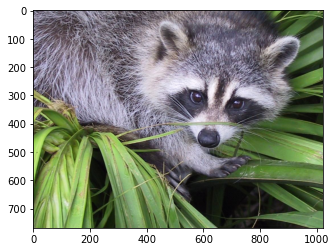

In [15]:
from scipy import misc
import matplotlib.pyplot as plt
face = misc.face()
# Pour charger en noir et blanc : face = misc.face(gray=True)
plt.imshow(face)
plt.show()

In [16]:
# face est un tableau numpy
print("type : ", type(face))
print("ndim : ", face.ndim)
print("shape : ", face.shape)

type :  <class 'numpy.ndarray'>
ndim :  3
shape :  (768, 1024, 3)


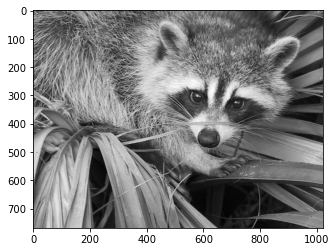


type :  <class 'numpy.ndarray'>
ndim :  2
shape :  (768, 1024)


In [17]:
from scipy import misc
import matplotlib.pyplot as plt
facenb = misc.face(gray=True)
# Pour charger en noir et blanc : face = misc.face(gray=True)
plt.imshow(facenb, cmap=plt.cm.gray)
plt.show()
print()
# face est un tableau numpy
print("type : ", type(facenb))
print("ndim : ", facenb.ndim)
print("shape : ", facenb.shape)

In [18]:
# zoomer de 1/4 vers le milieu de cette photo
# = obtenir les dimensions de la photo avec le tuple shape

taille zoom :  (192, 256)
milieu :  (512, 512)
depart :  (416, 384)
arrivee :  (608, 640)


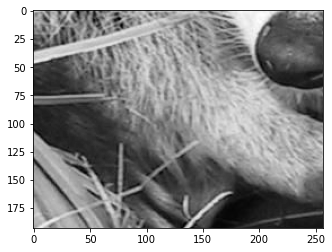


taille zone :  (768, 1024)


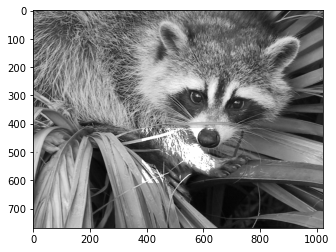


type :  <class 'numpy.ndarray'>
ndim :  2
shape :  (768, 1024)


In [19]:
# definir la taille de la zone zoomee
taillezoom = (int(facenb.shape[0]/4), int(facenb.shape[1]/4))
print("taille zoom : ", taillezoom)
# definir le milieu de l'image
milieu = (int(facenb.shape[1]/2), int(facenb.shape[1]/2))
print("milieu : ", milieu)
# definir le point de depart de la transformation
depart = (milieu[0] - int(taillezoom[0]/2), milieu[1] - int(taillezoom[1]/2))
print("depart : ", depart)
# definir le point d'arrive de la transformation
arrivee = (depart[0]+taillezoom[0], depart[1]+taillezoom[1])
print("arrivee : ", arrivee)


# IMAGE CROPPEE
# ------------
# Creer l'image croppee
imgcrop = facenb[depart[0]:(arrivee[0]+1), depart[1]:(arrivee[1]+1)]
plt.imshow(imgcrop, cmap=plt.cm.gray)
plt.show()
print()


# lui appliquer la transformation
zone = np.zeros((facenb.shape[0], facenb.shape[1]))
print("taille zone : ", zone.shape)
zone[depart[0]:(arrivee[0]+1), depart[1]:(arrivee[1]+1)] = 1.0
facenb[(facenb > 150) & (zone == 1.0)] = 255

plt.imshow(facenb, cmap=plt.cm.gray)
plt.show()
print()
# face est un tableau numpy
print("type : ", type(facenb))
print("ndim : ", facenb.ndim)
print("shape : ", facenb.shape)


### CORRECTION

Il est tellement plus malin que moi avec ses h//4


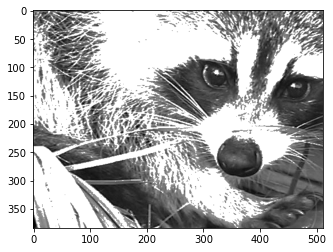

In [20]:
h = face.shape[0]
w = face.shape[1]

depart = (h/4, -h/4)
# IMAGE CROPPEE
# ------------
# Creer l'image croppee
# imgcrop = facenb[int(h/4):-int(h/4), int(w/4):-int(w/4)]
imgcrop = facenb[h//4 : -h//4, w//4 : -w//4]
# on blanchit les pixels clairs
imgcrop[imgcrop > 150] = 255
plt.imshow(imgcrop, cmap=plt.cm.gray)
plt.show()
print()

#### Comment reduire de moitie la taille de l'image sans perdre en qualite

(c'est presque de la compression d'image, mais ca n'en est pas)


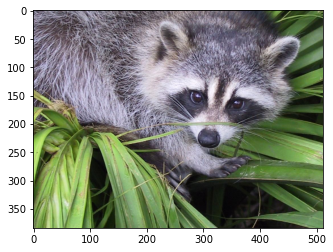

In [21]:
# slicing de pas 2
rd = face[::2,::2]
plt.imshow(rd, cmap=plt.cm.gray)
plt.show()
print()

# PIXELISER UNE IMAGE
UTILE POUR LA RECONNAISSANCE FACIALE
- Tu definis ou est le visage
- Tu slice par 2 plusieurs fois

In [22]:
from PIL import Image

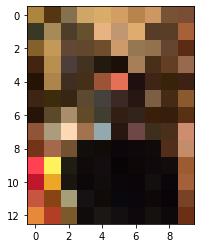

In [33]:
# load the image
image = Image.open('me_masked_at_kebab.jpg')
niter = 7

# convert image to numpy array
data = np.asarray(image)

# On definit un nombre de fois ou on va reiterer le slicing
for i in range(niter) :
    # On ne prend qu'un pixel sur 2 : slicing de 2
    data = data[::2,::2]
plt.imshow(data)
plt.show()
print()